## Problem Set 5
**Daniel Leskiewicz**

In [1]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Problem 1

#### a) Load in the wine data set from scikit learn

In [2]:
data = load_wine()
data = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])

In [3]:
data.loc[data['target'] == 1, 'target'] = 0
data.loc[data['target'] == 2, 'target'] = 1

In [4]:
scaler = StandardScaler()
train = scaler.fit_transform(np.array([data['hue'], data['flavanoids']]).T)

In [5]:
svm1 = SVC(kernel='linear', C=1)
svm10 = SVC(kernel='linear', C=10)
svm100 = SVC(kernel='linear', C=100)
svm1000 = SVC(kernel='linear', C=1000)

In [6]:
svm1 = svm1.fit(train, data['target'])
svm10 = svm10.fit(train, data['target'])
svm100 = svm100.fit(train, data['target'])
svm1000 = svm1000.fit(train, data['target'])

## C = 1

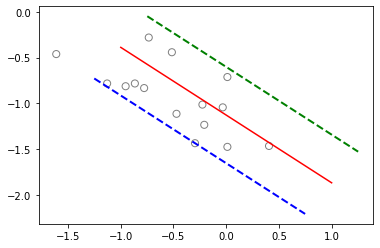

In [7]:
w = svm1.coef_[0]
b = svm1.intercept_[0]
p = np.linspace(-1,1)
y_points = -(w[0] / w[1]) * p - b /w[1]
plt.plot(p, y_points, c='r')
plt.scatter(svm1.support_vectors_[:,0], svm1.support_vectors_[:,1], s=50, facecolors='none', edgecolors='k', alpha=0.5)
w_h = svm1.coef_[0] / (np.sqrt(np.sum(svm1.coef_[0] ** 2)))
margins = 1 / np.sqrt(np.sum(svm1.coef_[0] ** 2))
db_p = np.array(list(zip(p,y_points)))
points_above = db_p + w_h * margins
points_below = db_p - w_h * margins
plt.plot(points_above[:,0], points_above[:,1], 'b--', linewidth=2)
plt.plot(points_below[:,0], points_below[:,1], 'g--', linewidth=2)
plt.show()

## C = 10

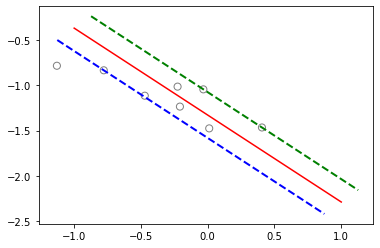

In [8]:
w = svm10.coef_[0]
b = svm10.intercept_[0]
p = np.linspace(-1,1)
y_points = -(w[0] / w[1]) * p - b /w[1]
plt.plot(p, y_points, c='r')
plt.scatter(svm10.support_vectors_[:,0], svm10.support_vectors_[:,1], s=50, facecolors='none', edgecolors='k', alpha=0.5)
w_h = svm10.coef_[0] / (np.sqrt(np.sum(svm10.coef_[0] ** 2)))
margins = 1 / np.sqrt(np.sum(svm10.coef_[0] ** 2))
db_p = np.array(list(zip(p,y_points)))
points_above = db_p + w_h * margins
points_below = db_p - w_h * margins
plt.plot(points_above[:,0], points_above[:,1], 'b--', linewidth=2)
plt.plot(points_below[:,0], points_below[:,1], 'g--', linewidth=2)
plt.show()

## C = 100

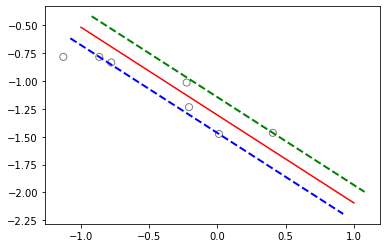

In [9]:
w = svm100.coef_[0]
b = svm100.intercept_[0]
p = np.linspace(-1,1)
y_points = -(w[0] / w[1]) * p - b /w[1]
plt.plot(p, y_points, c='r')
plt.scatter(svm100.support_vectors_[:,0], svm100.support_vectors_[:,1], s=50, facecolors='none', edgecolors='k', alpha=0.5)
w_h = svm100.coef_[0] / (np.sqrt(np.sum(svm100.coef_[0] ** 2)))
margins = 1 / np.sqrt(np.sum(svm100.coef_[0] ** 2))
db_p = np.array(list(zip(p,y_points)))
points_above = db_p + w_h * margins
points_below = db_p - w_h * margins
plt.plot(points_above[:,0], points_above[:,1], 'b--', linewidth=2)
plt.plot(points_below[:,0], points_below[:,1], 'g--', linewidth=2)
plt.show()

## C = 1000

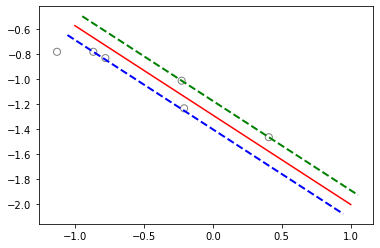

In [10]:
w = svm1000.coef_[0]
b = svm1000.intercept_[0]
p = np.linspace(-1,1)
y_points = -(w[0] / w[1]) * p - b /w[1]
plt.plot(p, y_points, c='r')
plt.scatter(svm1000.support_vectors_[:,0], svm1000.support_vectors_[:,1], s=50, facecolors='none', edgecolors='k', alpha=0.5)
w_h = svm1000.coef_[0] / (np.sqrt(np.sum(svm1000.coef_[0] ** 2)))
margins = 1 / np.sqrt(np.sum(svm1000.coef_[0] ** 2))
db_p = np.array(list(zip(p,y_points)))
points_above = db_p + w_h * margins
points_below = db_p - w_h * margins
plt.plot(points_above[:,0], points_above[:,1], 'b--', linewidth=2)
plt.plot(points_below[:,0], points_below[:,1], 'g--', linewidth=2)
plt.show()

The decision boundary doesn't really change much, the margins get smaller, and the support vector points on the plot doesn't really much change either.

## Problem 2

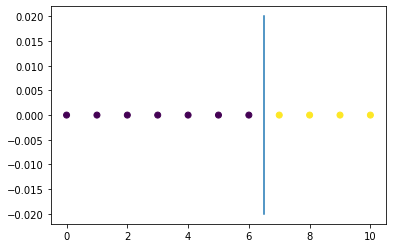

In [11]:
kp1 = np.loadtxt('Kernel_Problem_1.csv', delimiter=',')
plt.scatter(kp1[:,0], np.zeros(11) , c=kp1[:,1])
plt.plot([6.5, 6.5], [-.020, .020])

The observations are linearly seperable. The hyperplane would be n=<1,0>, r0=(6.5,0)

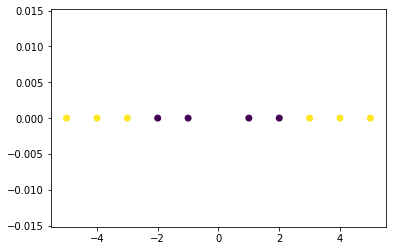

In [12]:
kp2 = np.loadtxt('Kernel_Problem_2.csv', delimiter=',')
plt.scatter(kp2[:,0], np.zeros(10), c=kp2[:,1])

These observations are not linearly seperable.

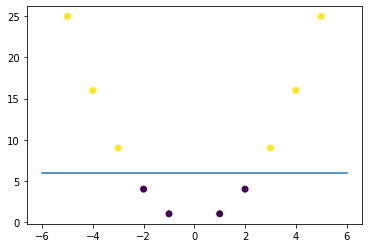

In [13]:
plt.scatter(kp2[:,0], kp2[:,0] * kp2[:,0], c=kp2[:,1])
plt.plot([-6,6],[6,6])

These observations are linearly separable

In [14]:
classes = np.array([])
for i in kp2[:,0]:
    if i < 0:
        classes = np.append(classes,0)
    else:
        classes = np.append(classes,1)

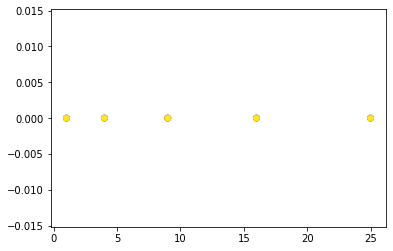

In [15]:
plt.scatter(kp2[:,0] * kp2[:,0], np.zeros(10), c=classes)

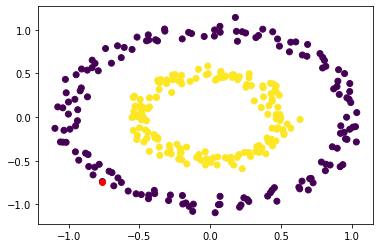

In [16]:
kp3 = np.loadtxt('Kernel_Problem_3.csv', delimiter=',')
plt.scatter(kp3[:,0], kp3[:,1], c=kp3[:,2])
plt.scatter(kp3[210,0], kp3[210,1], c='r')

These are not linear separable

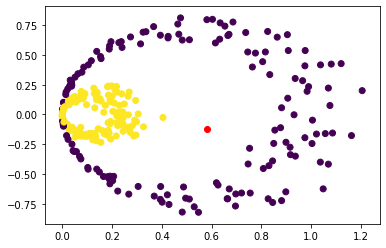

In [17]:
plt.scatter(kp3[:,0] ** 2, math.sqrt(2) * kp3[:,0] * kp3[:,1], c=kp3[:,2])
plt.scatter(kp3[210,0] ** 2, math.sqrt(2) * kp3[210,0] * kp3[201,1], c='r')

These are not linearly separable

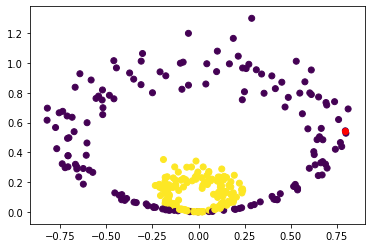

In [18]:
plt.scatter(math.sqrt(2) * kp3[:,0] * kp3[:,1], kp3[:,1] ** 2, c=kp3[:,2])
plt.scatter(math.sqrt(2) * kp3[210,0] * kp3[210,1], kp3[210,1] **2, c='r')

Still not linearly separable

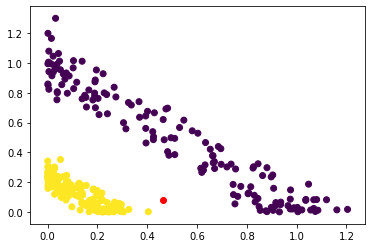

In [19]:
plt.scatter(kp3[:,0] ** 2, kp3[:,1] ** 2, c=kp3[:,2])
plt.scatter(kp3[259,0] ** 2, kp3[255,1] ** 2, c='r')

Finally they are linearly separable

#### Overall, x22 is the only one that is linearly seperable compared to the other equations